Dataset Explanation:
The Bike Sharing Dataset contains information about the number of bikes rented per hour in a bike-sharing system. The dataset has 17 columns, which are:
1.	instant: A unique identifier for each row.
2.	dteday: The date of the rental.
3.	season: The season of the year (1 = spring, 2 = summer, 3 = fall, 4 = winter).
4.	yr: The year of the rental (0 = 2011, 1 = 2012).
5.	mnth: The month of the rental (1 = January, 2 = February, ..., 12 = December).
6.	hr: The hour of the rental (0 = 0:00, 1 = 1:00, ..., 23 = 23:00).
7.	holiday: Whether the day is a holiday or not (0 = no, 1 = yes).
8.	weekday: The day of the week (0 = Sunday, 1 = Monday, ..., 6 = Saturday).
9.	workingday: Whether the day is a working day or not (0 = no, 1 = yes).
10.	weathersit: The weather situation (1 = clear, 2 = misty, 3 = light rain, 4 = heavy rain).
11.	temp: The temperature in Celsius.
12.	atemp: The feeling temperature in Celsius.
13.	hum: The humidity.
14.	windspeed: The wind speed.
15.	casual: The number of casual users.
16.	registered: The number of registered users.
17.	cnt: The total number of bikes rented (target variable).


In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Machine Learning

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split



In [2]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1OIYkqgTf0KBnvgO0sq3b4K4ZeFF6V-rM/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Bike Sharing.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Bike Sharing.csv')
data.head(50)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
data_info = data.info()
data_description = data.describe()

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(None,
           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
 std     5017.0295      1.106918      0.500008      3.438776      6.914405   
 min        1.0000      1.000000      0.000000      1.000000      0.000000   
 25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
 50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
 75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
 max    17379.0000      4.000000      1.000000     12.000000     23.000000   
 
             holiday       weekday    workingday    weathersit          temp  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       0.028770      3.003683      0.682721      1.425283      0.496987   
 std        0.167165      2.005771      0.465431 

**Data Preprocessing:**

1- Handle dteday by converting it to datetime.

2- Drop or transform irrelevant columns (e.g., instant).

3- Check for missing values (though none are visible here).


In [4]:
# Convert 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Drop 'instant' as it is just an index and not useful for modeling
data = data.drop(columns=['instant'])

# Check for missing values
missing_values = data.isnull().sum()


missing_values


,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Check unique values for All columns

In [5]:
for col in data.columns:
    unique_values = data[col].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{col}': {num_unique_values} unique values - {unique_values}")
    print("-------------------------------------")

Column 'dteday': 731 unique values - <DatetimeArray>
['2011-01-01 00:00:00', '2011-01-02 00:00:00', '2011-01-03 00:00:00',
 '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00',
 '2011-01-07 00:00:00', '2011-01-08 00:00:00', '2011-01-09 00:00:00',
 '2011-01-10 00:00:00',
 ...
 '2012-12-22 00:00:00', '2012-12-23 00:00:00', '2012-12-24 00:00:00',
 '2012-12-25 00:00:00', '2012-12-26 00:00:00', '2012-12-27 00:00:00',
 '2012-12-28 00:00:00', '2012-12-29 00:00:00', '2012-12-30 00:00:00',
 '2012-12-31 00:00:00']
Length: 731, dtype: datetime64[ns]
-------------------------------------
Column 'season': 4 unique values - [1 2 3 4]
-------------------------------------
Column 'yr': 2 unique values - [0 1]
-------------------------------------
Column 'mnth': 12 unique values - [ 1  2  3  4  5  6  7  8  9 10 11 12]
-------------------------------------
Column 'hr': 24 unique values - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
---------------------------

Check for categorical columns

In [6]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {categorical_cols}")

# Check for columns with a limited number of unique values (potential categorical)
for col in data.columns:
    if data[col].nunique() <= 10 : # Adjust threshold as needed
      print(f"Column '{col}' has a limited number of unique values ({data[col].nunique()}) - potentially categorical.")

Categorical columns: Index([], dtype='object')
Column 'season' has a limited number of unique values (4) - potentially categorical.
Column 'yr' has a limited number of unique values (2) - potentially categorical.
Column 'holiday' has a limited number of unique values (2) - potentially categorical.
Column 'weekday' has a limited number of unique values (7) - potentially categorical.
Column 'workingday' has a limited number of unique values (2) - potentially categorical.
Column 'weathersit' has a limited number of unique values (4) - potentially categorical.


# **Visualizations**

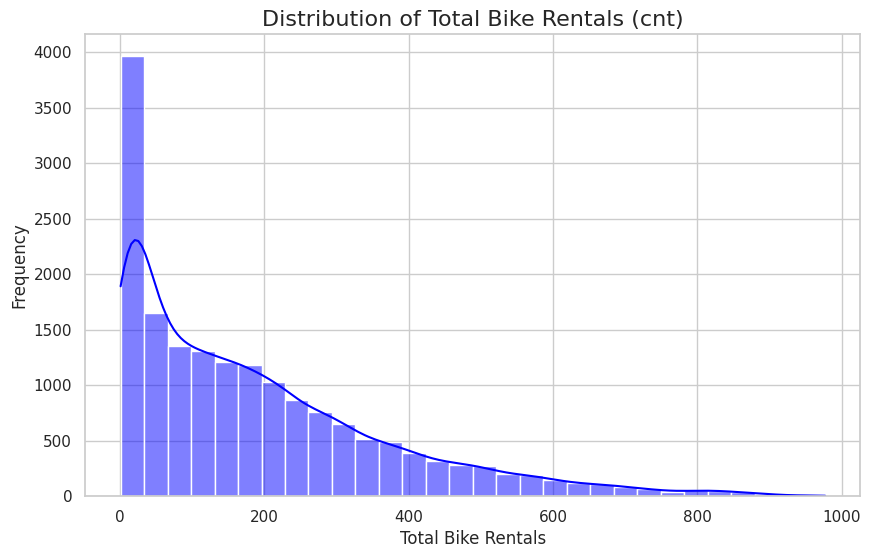

In [7]:
# Set up the style for plots
sns.set(style="whitegrid")

# Plot 1: Distribution of the target variable ('cnt')
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (cnt)', fontsize=16)
plt.xlabel('Total Bike Rentals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


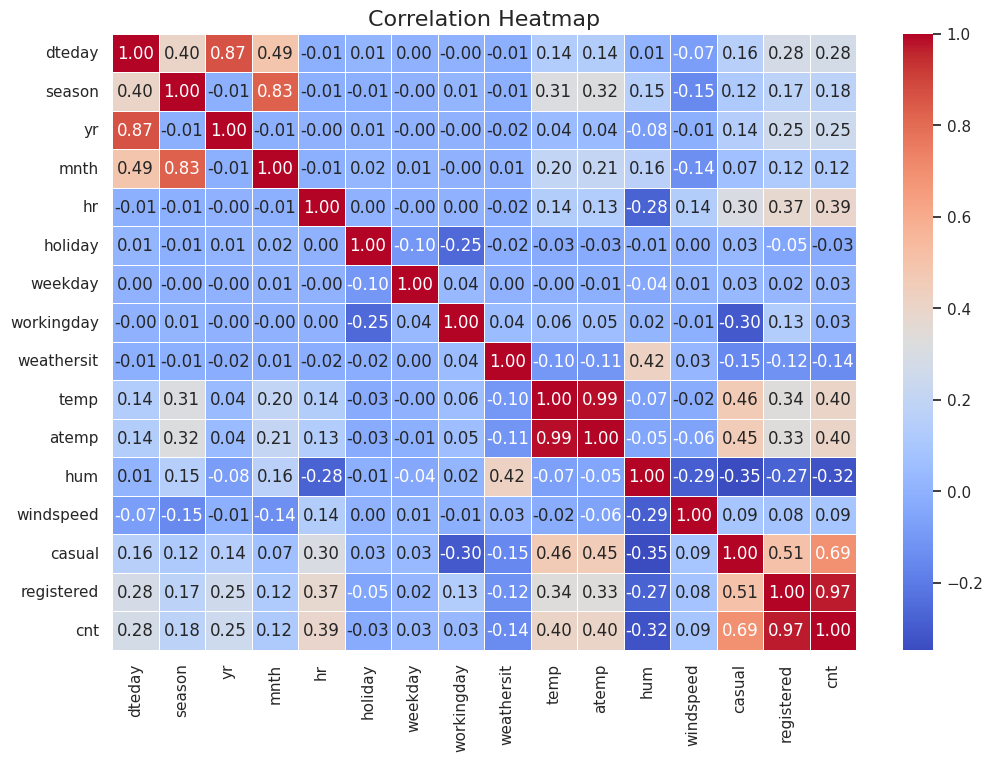

In [8]:

# Plot 2: Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


<ipython-input-9-bd09875f7800>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hr', y='cnt', data=data, palette='viridis')


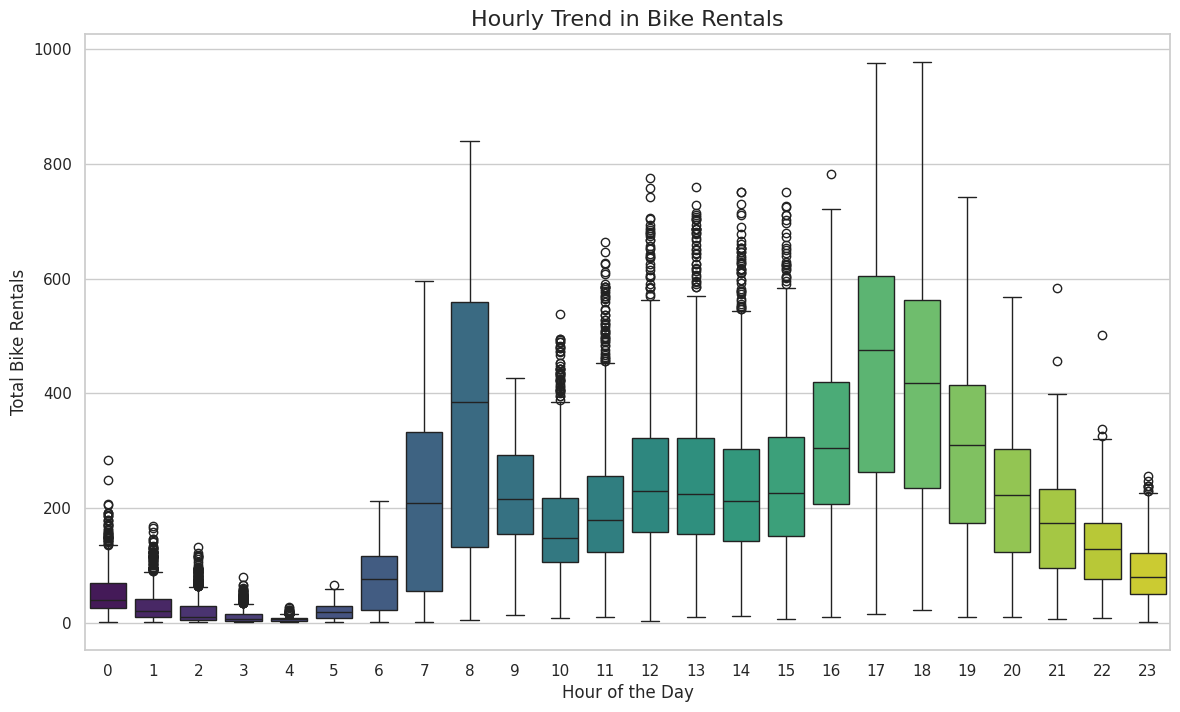

In [9]:

# Plot 3: Hourly trend in bike rentals
plt.figure(figsize=(14, 8))
sns.boxplot(x='hr', y='cnt', data=data, palette='viridis')
plt.title('Hourly Trend in Bike Rentals', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.show()


<ipython-input-10-aa93d4489af6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=data, palette='Set2')


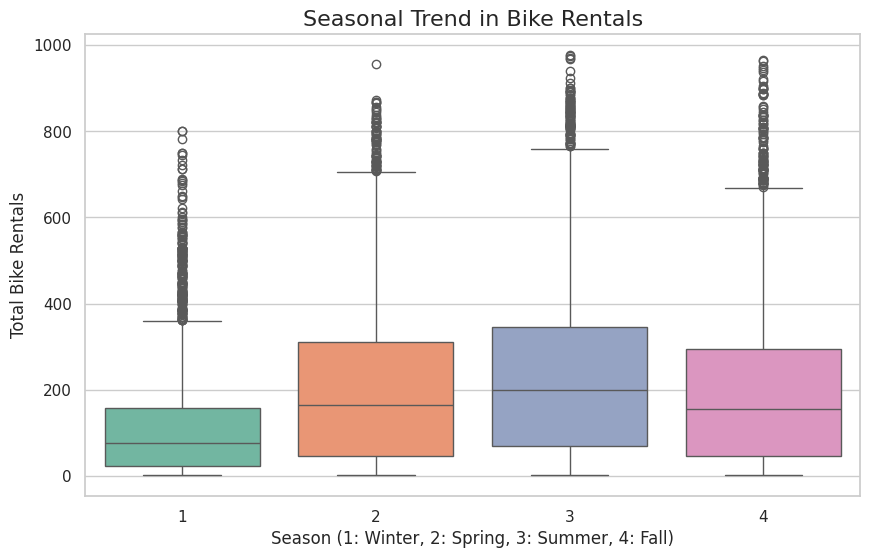

In [10]:

# Plot 4: Seasonal trend in bike rentals
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data, palette='Set2')
plt.title('Seasonal Trend in Bike Rentals', fontsize=16)
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.show()


Observations from the Visualizations:
1.	Target Variable Distribution:
 * The total bike rentals (cnt) exhibit a slightly right-skewed distribution, indicating more lower rental counts.
2.	Correlation Heatmap: Strong positive correlation between cnt and:
 *	registered (as expected, more registered users mean more rentals).
 * temp and atemp (indicating bike rentals increase with temperature).
 * casual and registered are also highly correlated with cnt.
 * windspeed has a weak negative correlation with cnt.

3.	Hourly Trends:
  *	Peak bike rentals occur during commuting hours (8 AM and 5-6 PM), likely due to work-related usage.

4.	Seasonal Trends:
 * Rentals are highest during summer (season 3) and fall (season 4), suggesting weather impacts on outdoor activities.


In [11]:


# Feature Engineering
data['day'] = data['dteday'].dt.day
data['week'] = data['dteday'].dt.isocalendar().week
data = data.drop(columns=['dteday', 'casual', 'registered'])

# Modeling Preparation
X = data.drop(columns=['cnt'])
y = data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((13903, 14), (3476, 14), (13903,), (3476,))

In [12]:
# Create a dictionary of regression algorithms with hyperparameters
regression_algorithms = {
    "Multiple Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=3,interaction_only= False, include_bias =True), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1,max_iter=10000),
    "Elastic Net Regression": ElasticNet(alpha= 0.01 ,l1_ratio= 0.7, max_iter= 10000),
    "Decision Tree Regression": DecisionTreeRegressor(  max_depth= 10, min_samples_split= 5,min_samples_leaf= 2),
    "Random Forest Regression": RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "ADA Boost Regression": AdaBoostRegressor(n_estimators=200, learning_rate=0.1, loss='square', random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "XGBoost Regression": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric="rmse"),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors= 5, weights= "distance", p= 2, ),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma='scale'),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Neural Network Regression": MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000, random_state=42)
}


In [15]:

# Directory to save models
model_dir = "trained_models"
os.makedirs(model_dir, exist_ok=True)

# Train and save each model
results = {}

for name, model in regression_algorithms.items():
    print(f"Training {name}...")
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Save the model
        model_path = os.path.join(model_dir, f"{name.replace(' ', '_')}.joblib")
        joblib.dump(model, model_path)

        # Store results
        results[name] = {"MSE": mse, "R²": r2,"MAE":mae ,"Model Path": model_path}

        print(f"{name} trained and saved successfully.")
    except Exception as e:
        results[name] = {"Error": str(e)}
        print(f"Error training {name}: {e}")

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.rename_axis('Model')
results_df


Training Multiple Linear Regression...
Multiple Linear Regression trained and saved successfully.
Training Polynomial Regression...
Polynomial Regression trained and saved successfully.
Training Ridge Regression...
Ridge Regression trained and saved successfully.
Training Lasso Regression...
Lasso Regression trained and saved successfully.
Training Elastic Net Regression...
Elastic Net Regression trained and saved successfully.
Training Decision Tree Regression...
Decision Tree Regression trained and saved successfully.
Training Random Forest Regression...
Random Forest Regression trained and saved successfully.
Training ADA Boost Regression...
ADA Boost Regression trained and saved successfully.
Training Gradient Boosting Regression...
Gradient Boosting Regression trained and saved successfully.
Training XGBoost Regression...
XGBoost Regression trained and saved successfully.
Training K-Nearest Neighbors Regression...
K-Nearest Neighbors Regression trained and saved successfully.
Trai

,MSE,R²,MAE,Model Path
Model,,,,
Multiple Linear Regression,19373.618260,0.388177,104.779931,trained_models/Multiple_Linear_Regression.joblib
Polynomial Regression,11881.185017,0.624790,78.209824,trained_models/Polynomial_Regression.joblib
Ridge Regression,19375.726030,0.388111,104.779839,trained_models/Ridge_Regression.joblib
Lasso Regression,19384.030688,0.387848,104.721417,trained_models/Lasso_Regression.joblib
Elastic Net Regression,19412.490609,0.386950,104.734825,trained_models/Elastic_Net_Regression.joblib
Decision Tree Regression,3342.054893,0.894457,35.196010,trained_models/Decision_Tree_Regression.joblib
Random Forest Regression,1701.363187,0.946271,24.427274,trained_models/Random_Forest_Regression.joblib
ADA Boost Regression,10054.146605,0.682488,77.080460,trained_models/ADA_Boost_Regression.joblib
Gradient Boosting Regression,1739.434751,0.945068,26.543764,trained_models/Gradient_Boosting_Regression.jo...


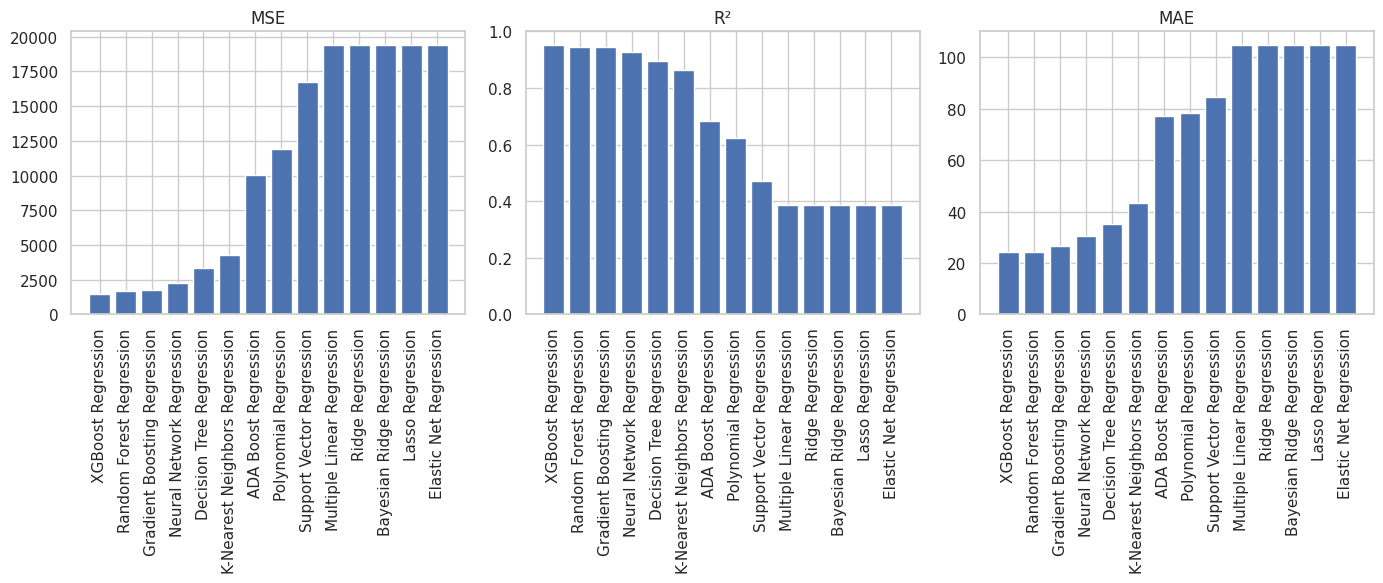

In [24]:

# Sort the results by R² score in descending order
results_df_sorted = results_df.sort_values(by='R²', ascending=False)

# Create the plot
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 3, 1)
plt.bar(results_df_sorted.index, results_df_sorted['MSE'])
plt.xticks(rotation=90)
plt.title('MSE')

# Plot R²
plt.subplot(1, 3, 2)
plt.bar(results_df_sorted.index, results_df_sorted['R²'])
plt.xticks(rotation=90)
plt.title('R²')

#Plot MAE
plt.subplot(1, 3, 3)
plt.bar(results_df_sorted.index, results_df_sorted['MAE'])
plt.xticks(rotation=90)
plt.title('MAE')

plt.tight_layout()
plt.show()

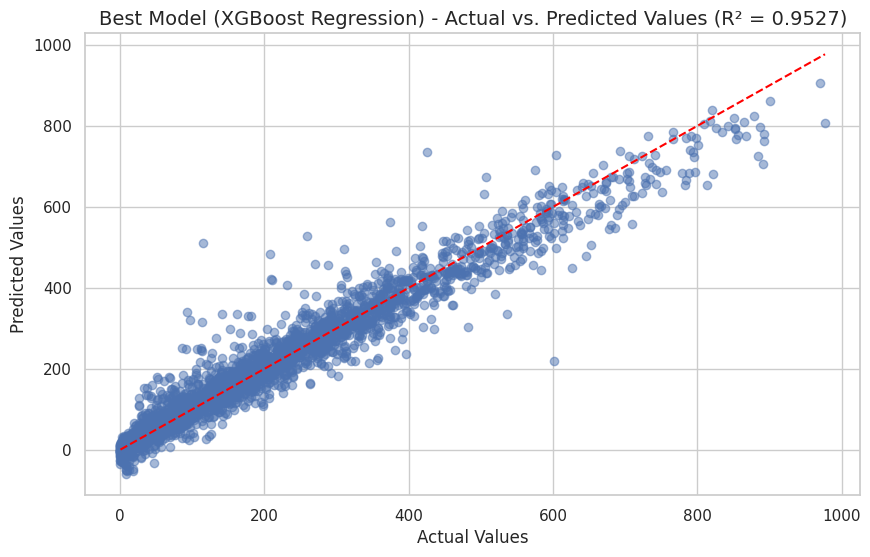

In [25]:

# Find the best model based on R-squared (you can change the metric)
best_model_name = results_df['R²'].idxmax()
best_model_r2 = results_df.loc[best_model_name, 'R²']

# Load the best model
best_model_path = results_df.loc[best_model_name, 'Model Path']
best_model = joblib.load(best_model_path)

# Predict using the best model
y_pred_best = best_model.predict(X_test)


# Plot the best model's predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line for reference
plt.title(f"Best Model ({best_model_name}) - Actual vs. Predicted Values (R² = {best_model_r2:.4f})", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.show()

In [26]:
def make_predictions(new_record):
    # Initialize an empty dictionary to store predictions
    predictions = {}
    model_dir = "trained_models"  # Use the directory where tuned models are saved
    if not os.path.exists(model_dir):
        print(f"Error: Model directory '{model_dir}' not found.")
        return predictions

    for filename in os.listdir(model_dir):
        if filename.endswith(".joblib"):
            model_name = filename[:-7].replace("_", " ") # Remove .joblib and replace _ with space
            model_path = os.path.join(model_dir, filename)

            try:
                # Load the model
                model = joblib.load(model_path)

                # Prepare the new record for prediction (convert to DataFrame)
                new_record_df = pd.DataFrame([new_record])

                # Make a prediction
                prediction = model.predict(new_record_df)
                predictions[model_name] = prediction[0]
            except Exception as e:
                print(f"Error loading or predicting with model {model_name}: {e}")
    return predictions


# Example usage (replace with your actual new record)
new_record = {
    'season':1, 'yr':0, 'mnth':1, 'hr':0, 'holiday':0, 'weekday':6, 'workingday':0,
    'weathersit':1, 'temp':0.24, 'atemp':0.2879, 'hum':0.81, 'windspeed':0, 'day':1, 'week':52
}


predictions = make_predictions(new_record)

if predictions:
    print("Predictions:")
    for model_name, prediction in predictions.items():
      print(f"{model_name}: {prediction}")
else:
    print("No predictions made.")

Predictions:
Multiple Linear Regression: -90.68905924399002
Support Vector Regression: -51.97191946802973
Elastic Net Regression: -88.59915385011433
Gradient Boosting Regression: 23.838350494557343
XGBoost Regression: 29.954835891723633
Ridge Regression: -90.8380059687673
ADA Boost Regression: 27.59202175883953
Neural Network Regression: 13.074879350062771
Decision Tree Regression: 18.666666666666668
Random Forest Regression: 29.710370370370377
Lasso Regression: -87.6407722885942
K-Nearest Neighbors Regression: 16.0
Bayesian Ridge Regression: -90.97248851414894
Polynomial Regression: 56.63335300534709
